In [44]:
import pandas as pd
import numpy as np


In [43]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
path ='/Users/Rajarshi/income_tr.csv'

In [68]:
data = pd.read_csv(path)

In [69]:
data.head()

,ID,age,workclass,fnlwgt,education,education_cat,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hour_per_week,native_country,class
0,9364,38,Private,197077,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
1,25668,31,Private,101761,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,51,United-States,<=50K
2,13316,26,Private,152855,HS-grad,9,Never-married,Exec-managerial,Own-child,Other,Female,0,0,40,Mexico,<=50K
3,28750,50,Self-emp-not-inc,99894,5th-6th,3,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,0,0,15,United-States,<=50K
4,30619,35,Private,412379,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [70]:
data.tail()

,ID,age,workclass,fnlwgt,education,education_cat,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hour_per_week,native_country,class
515,5504,21,Private,221955,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Mexico,<=50K
516,14573,26,Private,272669,Bachelors,13,Never-married,Sales,Not-in-family,Asian-Pac-Islander,Male,0,0,20,South,<=50K
517,24681,43,Federal-gov,95902,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,United-States,<=50K
518,2008,24,Private,296045,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,2635,0,38,United-States,<=50K
519,26117,26,Local-gov,219760,HS-grad,9,Never-married,Other-service,Other-relative,White,Male,0,0,16,United-States,<=50K


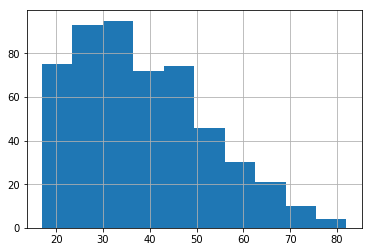

In [141]:
data.age.value_counts()
data.age.hist()

In [90]:
data = data.rename(columns={"class": "income"})
#data.head()
data.income.value_counts()

 <=50K    420
 >50K     100
Name: income, dtype: int64

In [91]:
data['income>50K'] = np.where(data.income == ' <=50K', 0, 1) 
data['income>50K'].value_counts()

0    420
1    100
Name: income>50K, dtype: int64

In [94]:
# a function similar to make_df_simple, but with one more column
def make_df(df, feature):
    df_less50K = df.loc[df['income>50K']==0, feature].value_counts().sort_index()
    df_more50K = df.loc[df['income>50K']==1, feature].value_counts().sort_index()
    df_sep = pd.concat([df_less50K, df_more50K], axis=1)
    df_sep.columns = ['<50K', '>50K']
    df_sep = df_sep.fillna(value=0)
    df_sep['total'] = df_sep.sum(axis=1)
    df_sep['percent of >50K'] = (df_sep['>50K'] / df_sep['total']) *100
    df_sep.sort_values(by=['percent of >50K'], ascending=False, inplace=True)
    return df_sep

In [154]:
# Distribution corresponding to the workclass
df_work_class = make_df(data, 'workclass')
df_work_class['>50K']

 Self-emp-inc         5
 Local-gov            9
 Federal-gov          4
 State-gov            5
 Self-emp-not-inc     8
 ?                    5
 Private             64
Name: >50K, dtype: int64

In [134]:
# Distribution corresponding to Edudation
df_ed = make_df(data, 'education')
df_ed

,<50K,>50K,total,percent of >50K
Doctorate,1,6.0,7.0,85.714286
Masters,11,17.0,28.0,60.714286
Prof-school,4,6.0,10.0,60.000000
Bachelors,56,28.0,84.0,33.333333
Assoc-voc,15,4.0,19.0,21.052632
7th-8th,12,2.0,14.0,14.285714
Some-college,102,15.0,117.0,12.820513
HS-grad,142,19.0,161.0,11.801242
9th,9,1.0,10.0,10.000000
Assoc-acdm,18,2.0,20.0,10.000000


In [111]:
df_ed_temp = df_ed.loc[' Assoc-voc':' Preschool', :].copy()
df_ed_temp2 = df_ed.loc[' Doctorate':' Bachelors', :].copy()
df_ed_new = pd.concat([df_ed_temp2.T, df_ed_temp.sum(axis=0)], axis=1)
df_ed_new.columns = ['Doctorate', 'Prof-school', 'Masters', 'Bachelors', 'Other']
df_ed_new = df_ed_new.T
df_ed_new['percent of >50K'] = (df_ed_new['>50K'] / (df_ed_new['<50K'] + df_ed_new['>50K']))*100
df_ed_new

,<50K,>50K,total,percent of >50K
Doctorate,1.0,6.0,7.0,85.714286
Prof-school,11.0,17.0,28.0,60.714286
Masters,4.0,6.0,10.0,60.000000
Bachelors,56.0,28.0,84.0,33.333333
Other,348.0,43.0,391.0,10.997442


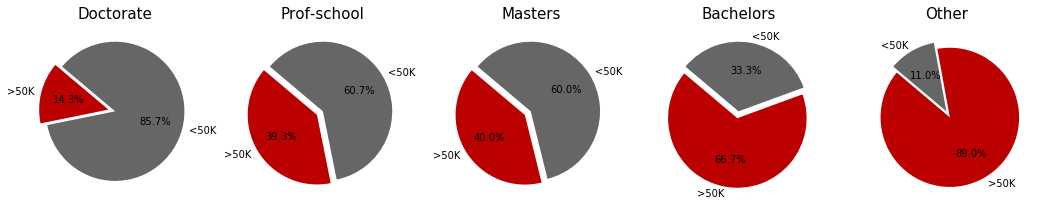

In [112]:
plt.figure(figsize=(18, 3.2))
for i in range(5):
    labels = ">50K", "<50K"
    explode = (0.1, 0)
    toPie = [df_ed_new.iloc[i, 0], df_ed_new.iloc[i, 1]]
    plt.subplot(1, 5, i+1)
    plt.pie(toPie, explode=explode, labels=labels, colors=['#bb0000', '#666666'],
        autopct='%1.1f%%', shadow=False, startangle=140);
    plt.title(df_ed_new.index[i], fontsize=15)

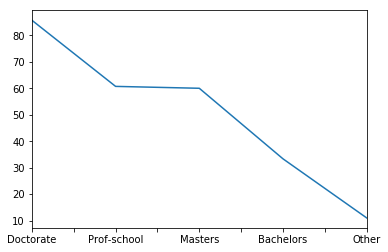

In [113]:
df_ed_new["percent of >50K"].plot()

In [155]:
# Analysis based on the occupation
data['occupation'].unique()

array([' Other-service', ' Craft-repair', ' Exec-managerial',
       ' Tech-support', ' Sales', ' Machine-op-inspct', ' Prof-specialty',
       ' Handlers-cleaners', ' ?', ' Transport-moving', ' Adm-clerical',
       ' Protective-serv', ' Priv-house-serv', ' Farming-fishing'], dtype=object)

In [133]:
df_occu = make_df(data, 'occupation')
df_occu

,<50K,>50K,total,percent of >50K
Prof-specialty,39,28.0,67.0,41.791045
Exec-managerial,38,27.0,65.0,41.538462
Farming-fishing,11,4.0,15.0,26.666667
Sales,40,9.0,49.0,18.367347
?,23,5.0,28.0,17.857143
Craft-repair,55,10.0,65.0,15.384615
Tech-support,16,2.0,18.0,11.111111
Adm-clerical,65,8.0,73.0,10.958904
Protective-serv,9,1.0,10.0,10.000000
Handlers-cleaners,20,2.0,22.0,9.090909


In [ ]:
df_ed_temp = df_ed.loc[' Prof-specialty':' Preschool', :].copy()
df_ed_temp2 = df_ed.loc[' Doctorate':' Bachelors', :].copy()
df_ed_new = pd.concat([df_ed_temp2.T, df_ed_temp.sum(axis=0)], axis=1)
df_ed_new.columns = ['Doctorate', 'Prof-school', 'Masters', 'Bachelors', 'Other']
df_ed_new = df_ed_new.T
df_ed_new['percent of >50K'] = (df_ed_new['>50K'] / (df_ed_new['<50K'] + df_ed_new['>50K']))*100
df_ed_new

In [183]:
# Catagorize the occupation
data['occup_catagory'] = data.occupation.map ({' Other-service' : 0, ' Craft-repair' : 1, ' Exec-managerial' :2,
       ' Tech-support' : 3, ' Sales': 4, ' Machine-op-inspct': 5, ' Prof-specialty' : 6,
       ' Handlers-cleaners' : 7, ' ?': 8, ' Transport-moving' : 9, ' Adm-clerical' : 10,
       ' Protective-serv' : 11, ' Priv-house-serv': 12, ' Farming-fishing':13})

In [288]:
# Catagorize the occupation
data['occup_catagory'] = data.occupation.map ({' Other-service' : 0, ' Craft-repair' : 0, ' Exec-managerial' :2,
       ' Tech-support' : 0, ' Sales': 0, ' Machine-op-inspct': 0, ' Prof-specialty' : 6,
       ' Handlers-cleaners' : 0, ' ?': 0, ' Transport-moving' : 0, ' Adm-clerical' : 0,
       ' Protective-serv' : 0, ' Priv-house-serv': 0, ' Farming-fishing':0})

In [333]:
# Filter the occupation "prof-speciality" amd income more than 50k
temp = data[data['occup_catagory'] == 6]
temp = temp[temp['income>50K'] == 1]

#temp.age.describe()
#temp.education.value_counts().plot(kind = 'bar') # Polits the different education 
#temp
# Worth noticing that All the doctorates that earns more than 50 K are doing this job
#t = temp[temp['education']== ' Bachelors'].age
#temp.age.describe()
data.workclass.value_counts()
#temp.workclass.value_counts()
#temp.age.describe()

 Private             365
 Self-emp-not-inc     38
 Local-gov            34
 ?                    28
 State-gov            23
 Federal-gov          18
 Self-emp-inc         14
Name: workclass, dtype: int64

In [330]:
# Filter the occupation "Exec" amd income more than 50k
temp = data[data['occup_catagory'] == 2]
temp = temp[temp['income>50K'] == 1]

#temp.age.describe()
#temp.education.value_counts().plot(kind = 'bar') # Polits the different education 
#temp
# Worth noticing that All the doctorates that earns more than 50 K are doing this job
#t = temp[temp['education']== ' Bachelors'].age
#temp.age.describe()



count    15.000000
mean     48.066667
std      12.423863
min      25.000000
25%      42.500000
50%      45.000000
75%      58.500000
max      72.000000
Name: age, dtype: float64

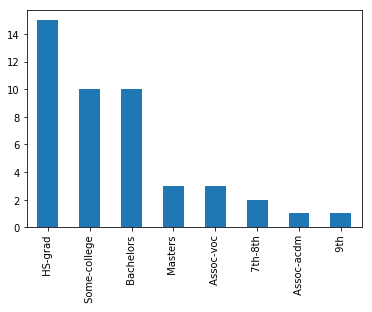

In [317]:
# Filter the occupation of other catagory 
temp = data[data['occup_catagory'] == 0]
temp = temp[temp['income>50K'] == 1]

#temp.age.describe()
temp.education.value_counts().plot(kind = 'bar') # Polits the different education 
#temp.count()
# Worth noticing that All the doctorates that earns more than 50 K are doing this job
#t = temp[temp['education']== ' Bachelors'].age
#temp.age.describe()
temp = temp[temp['education'] == ' HS-grad']
temp.age.describe()